In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head(5)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

EDA

In [ ]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [ ]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [ ]:
cat= ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [ ]:
for i in cat:
    df[i]=df[i].astype(int)

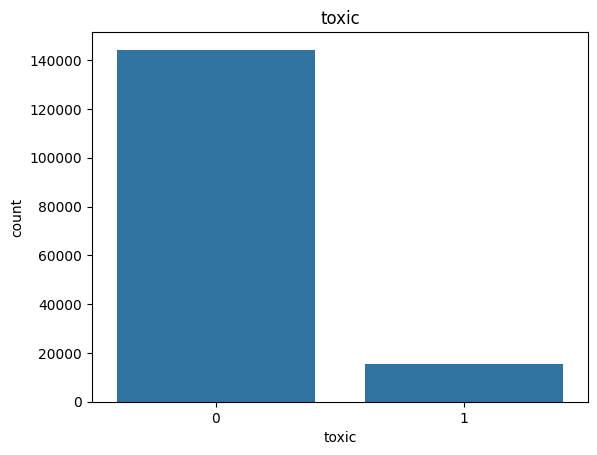

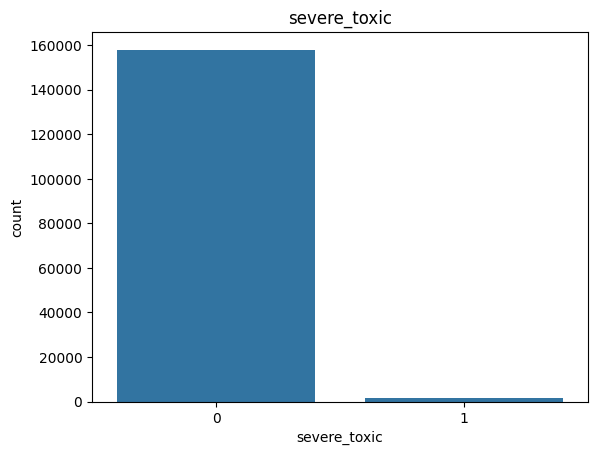

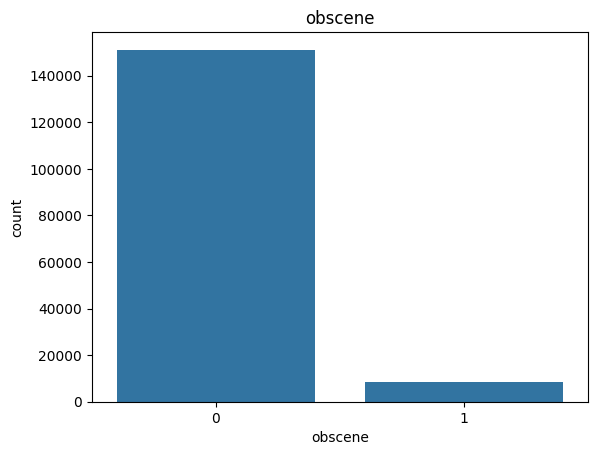

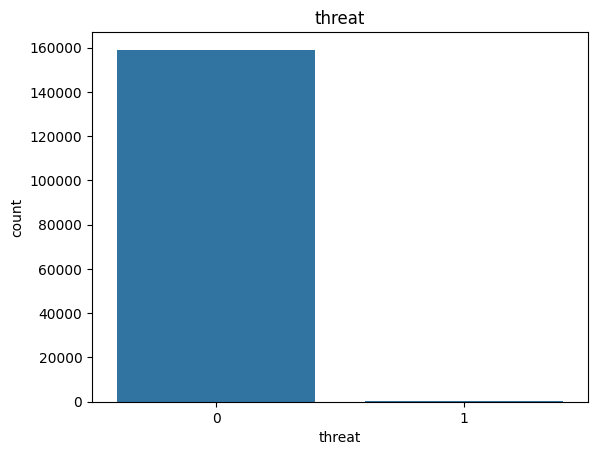

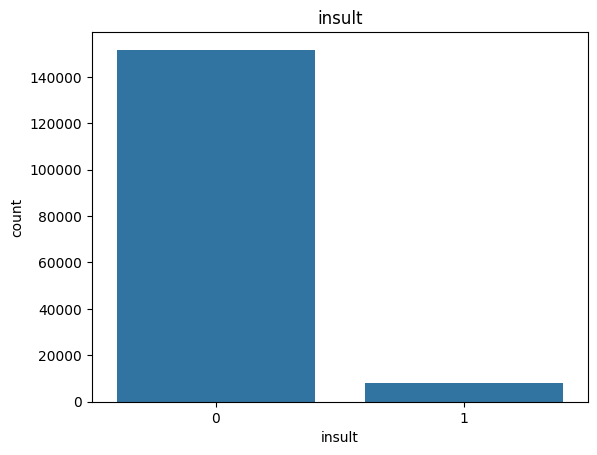

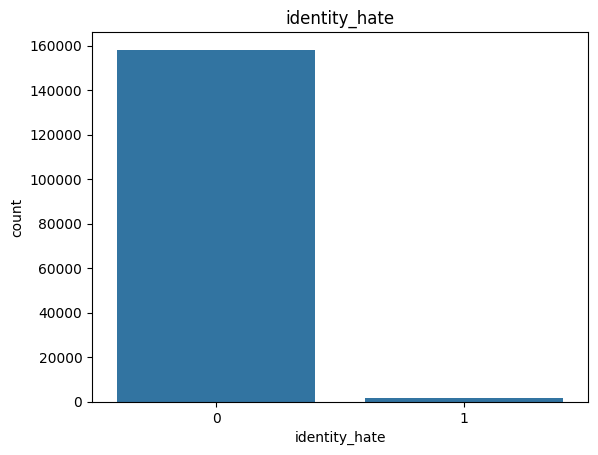

In [ ]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
  sns.countplot(x=c,data= df)
  plt.title(c)
  plt.show()

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
!pip install nltk

In [ ]:
#nltk.download('stopwords')

In [ ]:
stopwords

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>

In [ ]:
import re
stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords)

    return text.lower()

In [ ]:
texts = [
    "\nMore\nI can't make any       real sugges%%%%%tions on improvement - I wondered if the section statistics should b|e later on, or a subsect\nion of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"
]
cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i cant make any real suggestions improvement i wondered section statistics should be later subsect ion types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wikipediagoodarticlenominationstransport']


In [ ]:
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text'].head()

0    explanation why edits made under my username h...
1    daww he matches this background colour im seem...
2    hey man im really not trying edit war its just...
3    more i cant make any real suggestions improvem...
4    sir are my hero any chance remember what page ...
Name: comment_text, dtype: object

In [ ]:
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  explanation why edits made under my username h...      0   
1  000103f0d9cfb60f  daww he matches this background colour im seem...      0   
2  000113f07ec002fd  hey man im really not trying edit war its just...      0   
3  0001b41b1c6bb37e  more i cant make any real suggestions improvem...      0   
4  0001d958c54c6e35  sir are my hero any chance remember what page ...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

#Data Visualization

In [ ]:
target_labels= [col for col in df.columns if df[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#Visualizing the Category of Dataset

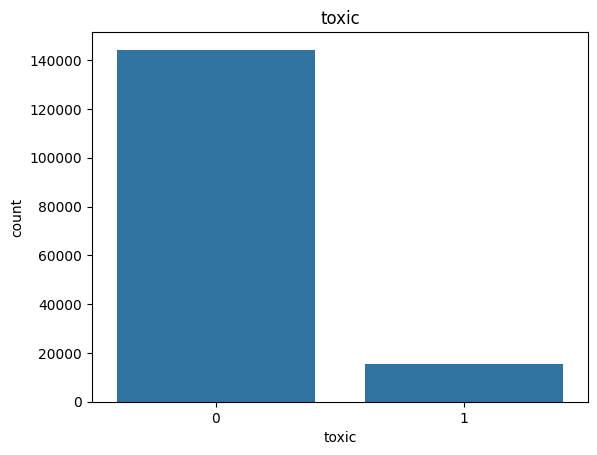

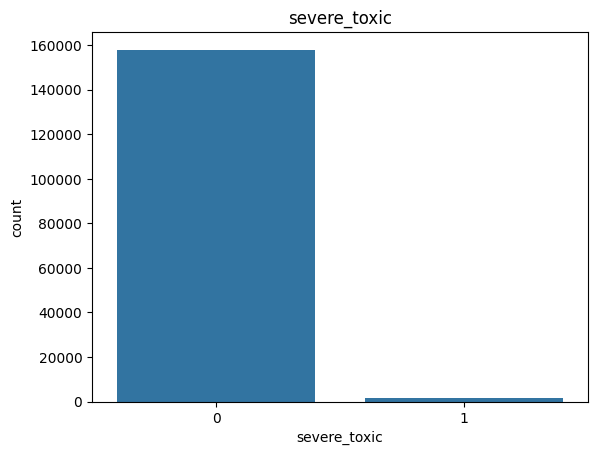

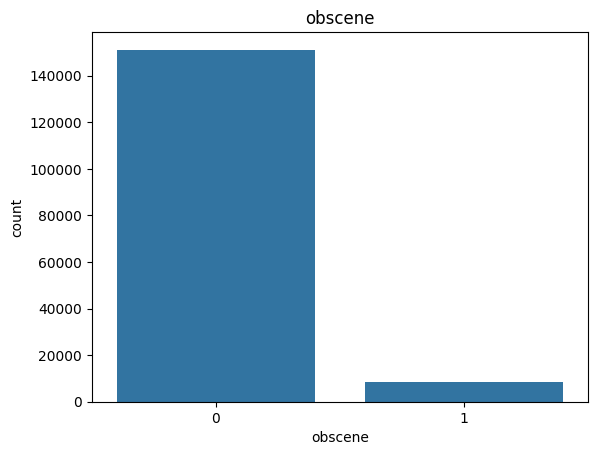

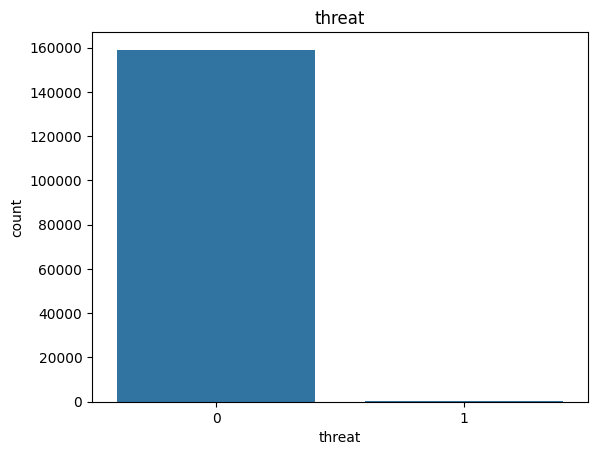

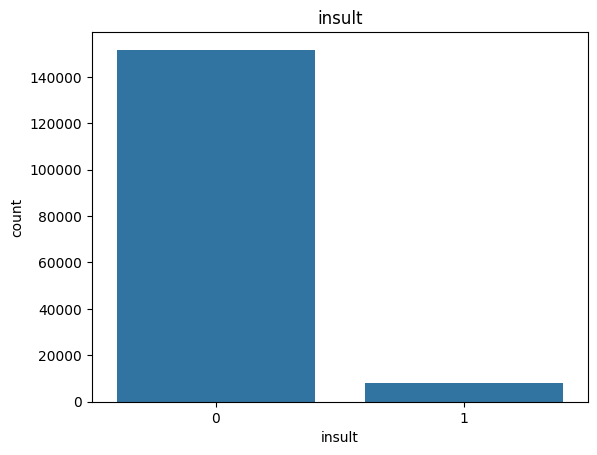

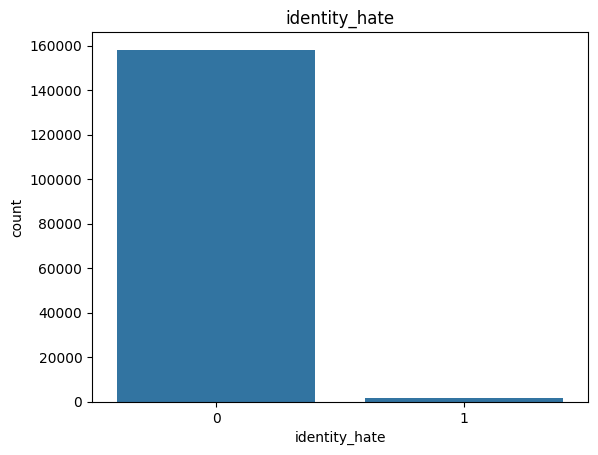

In [ ]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
  sns.countplot(x=c,data= df)
  plt.title(c)
  plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df[df['toxic'] == 1]['comment_text'].describe()

count                                             15294
unique                                            15173
top       graceful slick non other than ungraceful dick
freq                                                  8
Name: comment_text, dtype: object

In [ ]:
df[df['severe_toxic'] == 1]['comment_text'].describe()

count                  1595
unique                 1592
top       fuck off fuck off
freq                      2
Name: comment_text, dtype: object

In [ ]:
df[df['obscene'] == 1]['comment_text'].describe()

count                                              8449
unique                                             8388
top       graceful slick non other than ungraceful dick
freq                                                  5
Name: comment_text, dtype: object

In [ ]:
df[df['threat'] == 1]['comment_text'].describe()

count                                  478
unique                                 470
top       i will ki ll wear skin like robe
freq                                     2
Name: comment_text, dtype: object

In [ ]:
df[df['insult'] == 1]['comment_text'].describe()

count                    7877
unique                   7831
top       guess what retarded
freq                        4
Name: comment_text, dtype: object

In [ ]:
df[df['identity_hate'] == 1]['comment_text'].describe()

count                                                  1405
unique                                                 1396
top       fuck ckatz are german cock sucker fucker mothe...
freq                                                      3
Name: comment_text, dtype: object

In [ ]:
df[df['toxic'] == 0]['comment_text'].describe()

count     144277
unique    143036
top             
freq          28
Name: comment_text, dtype: object

In [ ]:
df[df['severe_toxic'] == 0]['comment_text'].describe()

count     157976
unique    156605
top             
freq          28
Name: comment_text, dtype: object

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

#Toxic Comment WordCloud

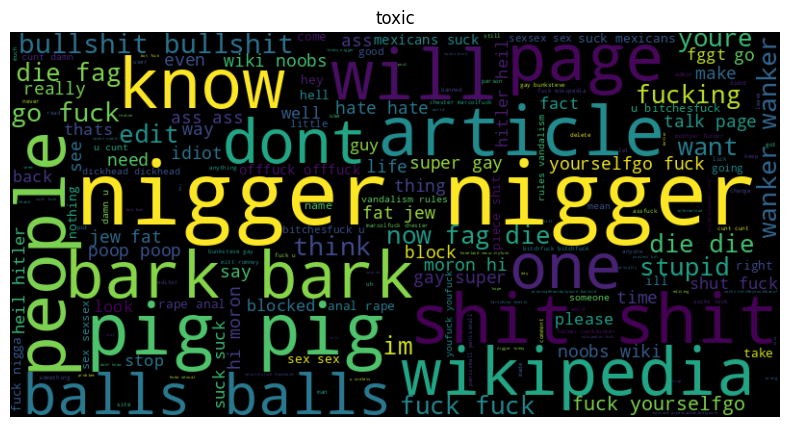

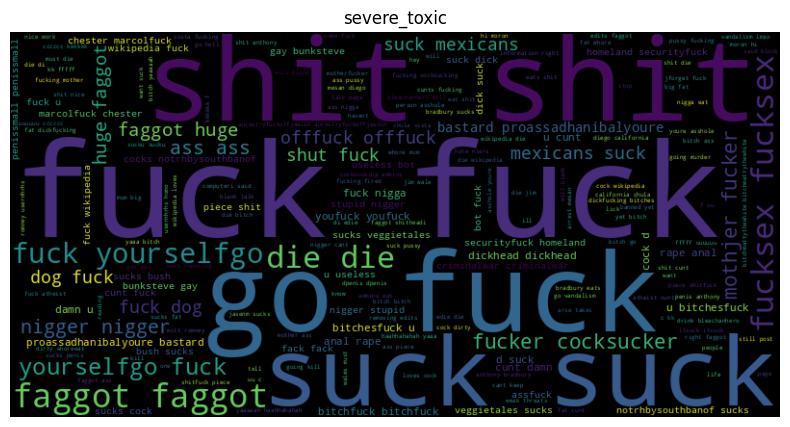

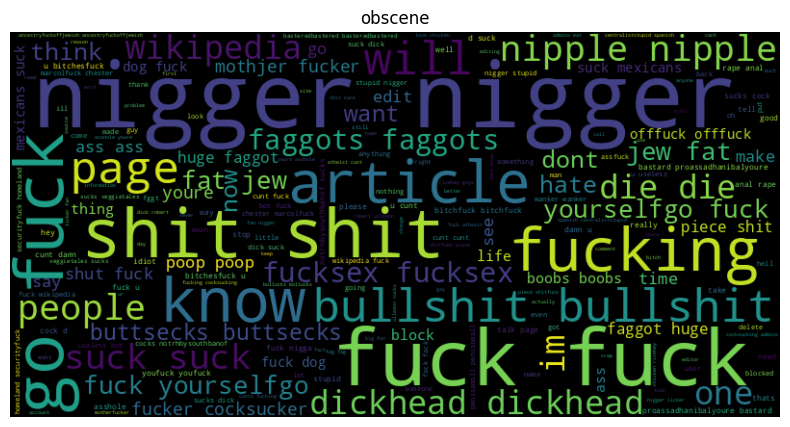

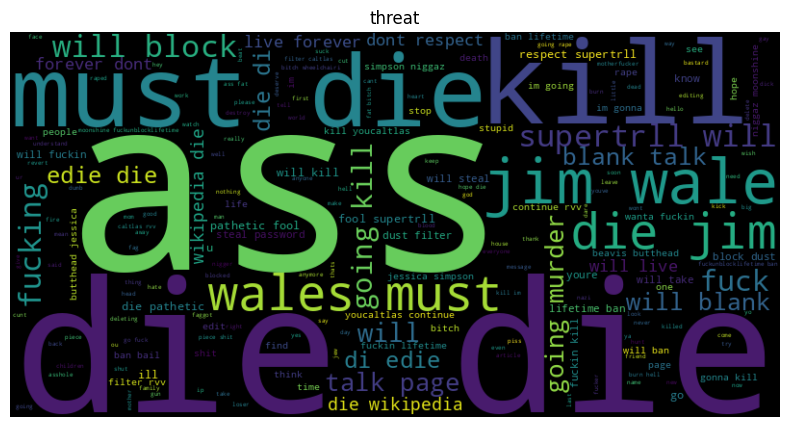

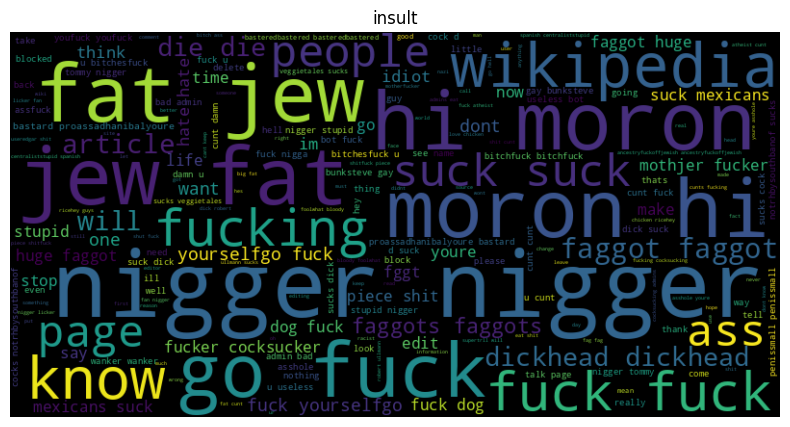

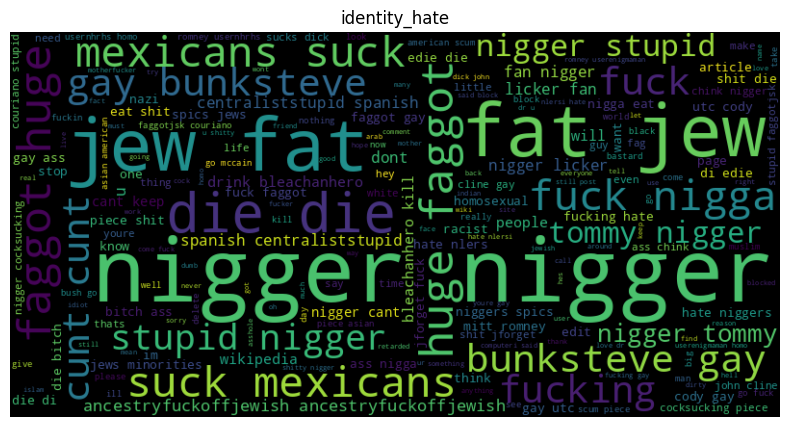

In [ ]:
# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 1]['comment_text'].head(10000).values)
    generate_wordcloud(text,Title=label)
    plt.show()

#Non Toxic Comment WordCloud

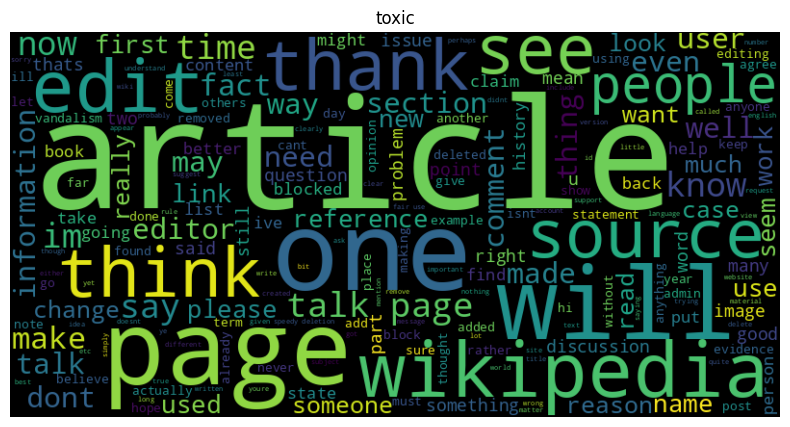

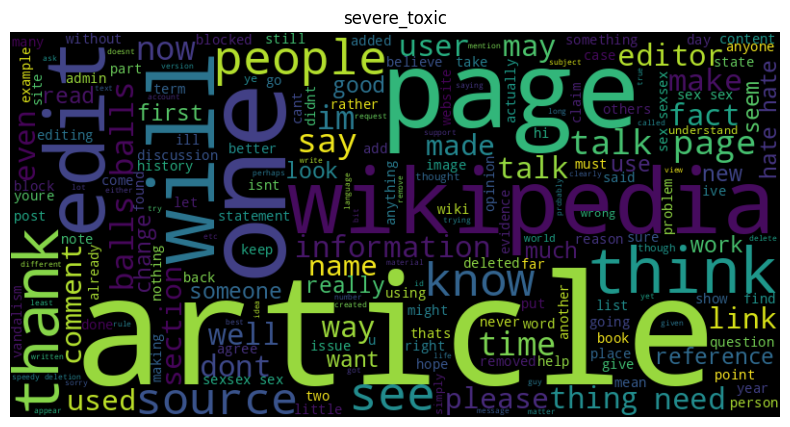

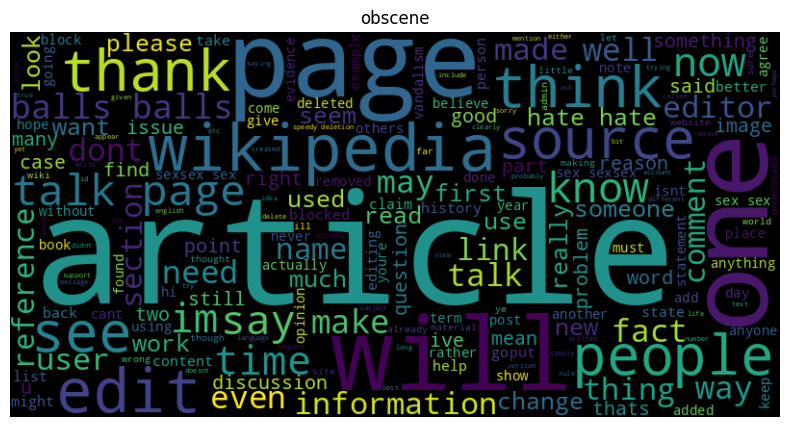

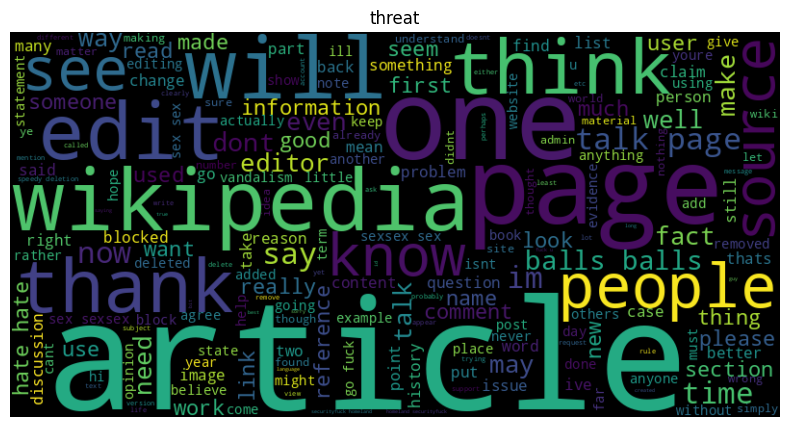

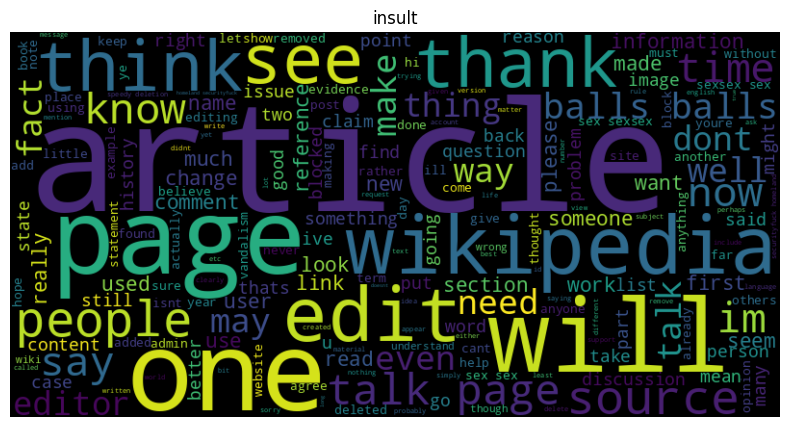

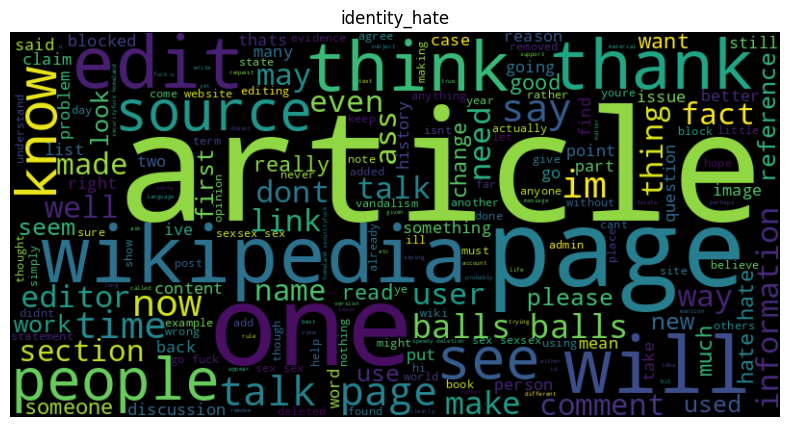

In [ ]:
# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 0]['comment_text'].head(10000).values)
    generate_wordcloud(text,Title=label)